# IRIS Data Analysis

## My To-Do List
1. تحميل قاعدة البيانات
2. طباعة البداية والنهاية والمعلومات عن قاعدة البيانات
3. تمثيل قاعدة البيانات بالرسومات
4. تهيئة قاعدة البيانات للتحليل
5. تحليل قاعدة البيانات
6. كتابة الملاحظة

# التدريب
- التركيز على استيراد البيانات
- تمثيل البيانات
- تطبيق النظريات السابقة
- اضافة هذا العمل الى جيت هوب

# التدريب
يجب فهم قاعدة البيانات قبل البدء يجب ان نعرف ماذا تعني هذه البيانات
---
![Alt Text](iris-machinelearning.png)

### الخطوة الاولى: بناء نظرة عامة على البيانات

In [41]:
# المكتبات المستخدمة في المشروع
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [42]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# Check the shape of the dataset
print(f"\nDataset shape: {iris_df.shape}")

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset shape: (150, 5)


In [43]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Check Data balance.

In [44]:
iris_df["species"].value_counts() 

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Check for missing values

In [45]:
print("\nMissing values:")
print(iris_df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [46]:
# Get basic information about the dataset
print("\nDataset info:")
print(iris_df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


 نلاحظ ان الانواع جميعها عددية عدا الاخير فنوعه فئوي

In [47]:
# Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


**نلاحظ هنا**
- Count: عدد القيم غير الفارغة (القيم التي تحتوي على بيانات) في العمود.
- Mean: المتوسط الحسابي (القيمة المتوسطة) للعمود.
- Std: الانحراف المعياري للعمود.
- Min: أقل قيمة في العمود.
- 25%: الربيع الأول (النسبة المئوية الـ 25)، أي 25% من البيانات أقل من هذه القيمة.
- 50%: الوسيط (الربيع الثاني)، وهو القيمة التي تفصل البيانات إلى نصفين متساويين.
- 75%: الربيع الثالث (النسبة المئوية الـ 75)، أي 75% من البيانات أقل من هذه القيمة.
- Max: أكبر قيمة في العمود.

In [48]:
# Count of each species
print("\nSpecies distribution:")
print(iris_df['species'].value_counts())


Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### الخطوة الثانية : تمثيل البيانات بالرسوم

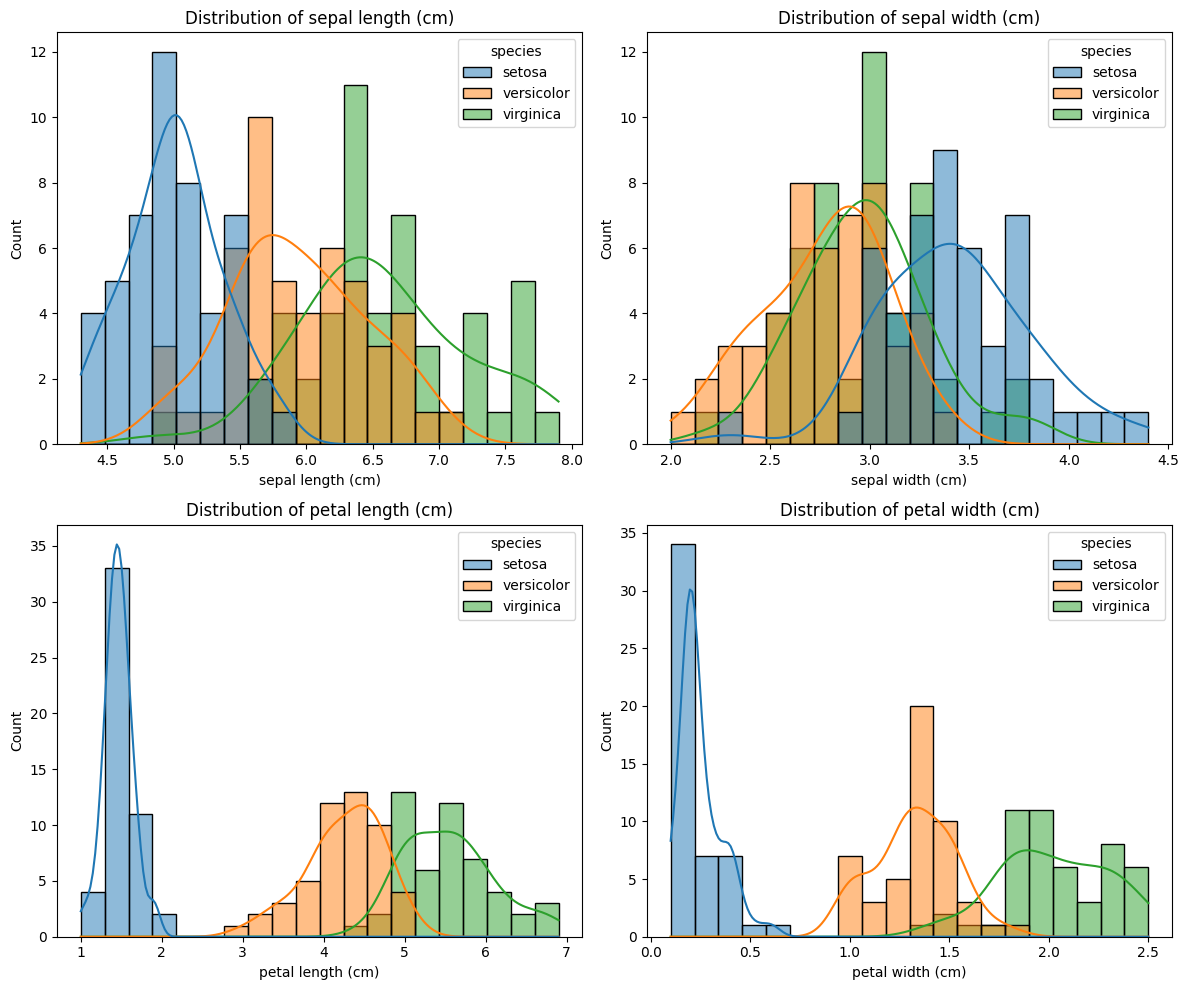

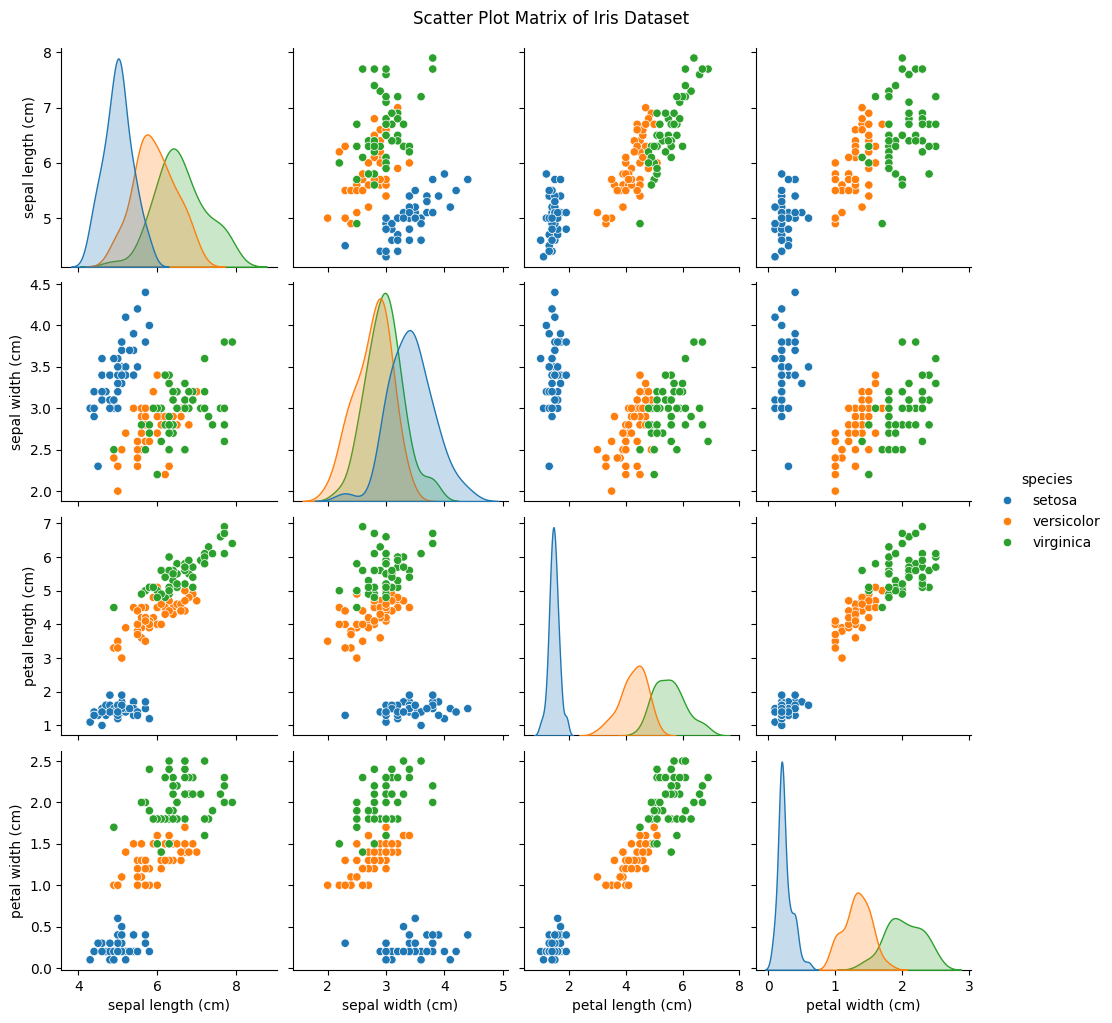

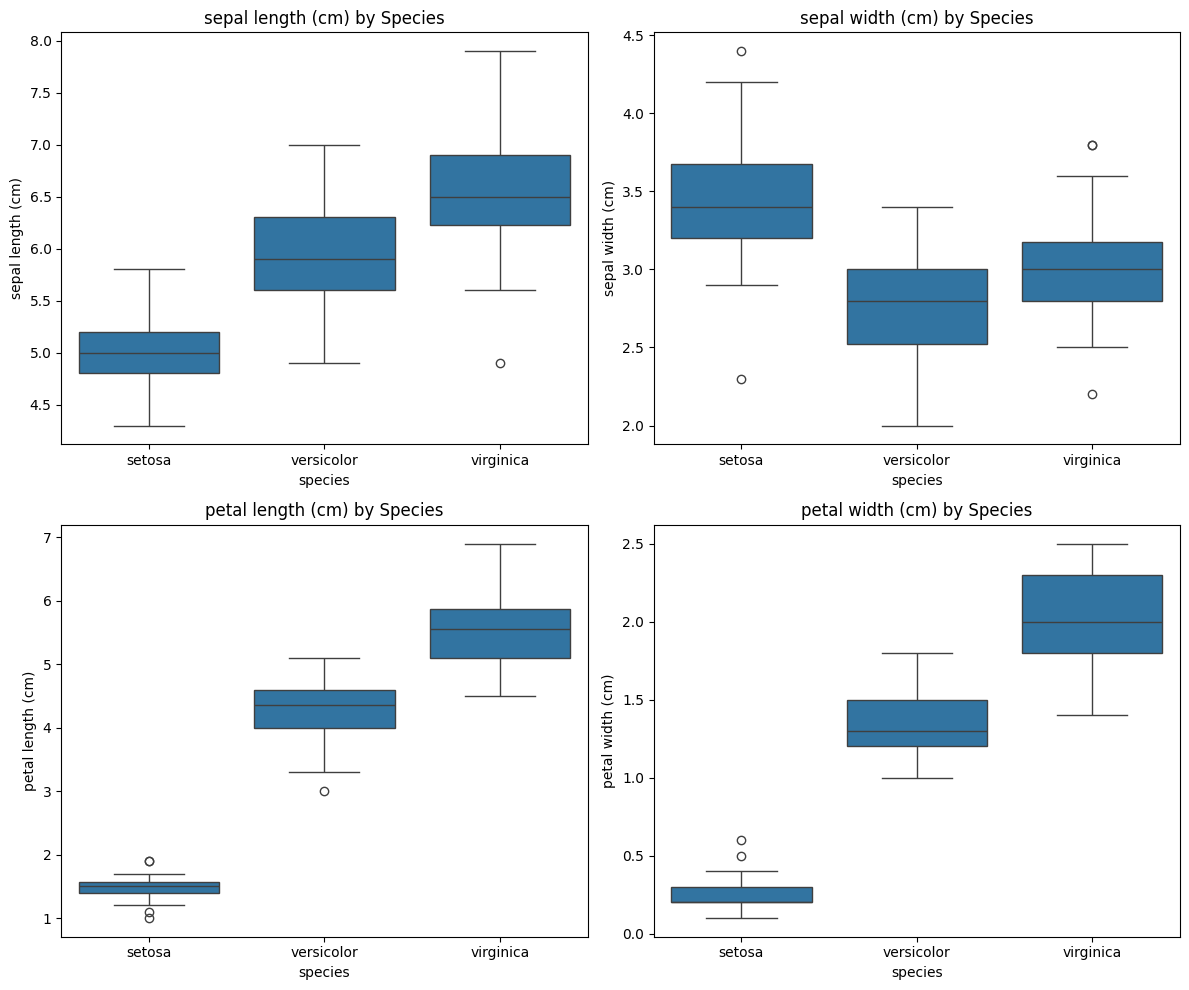

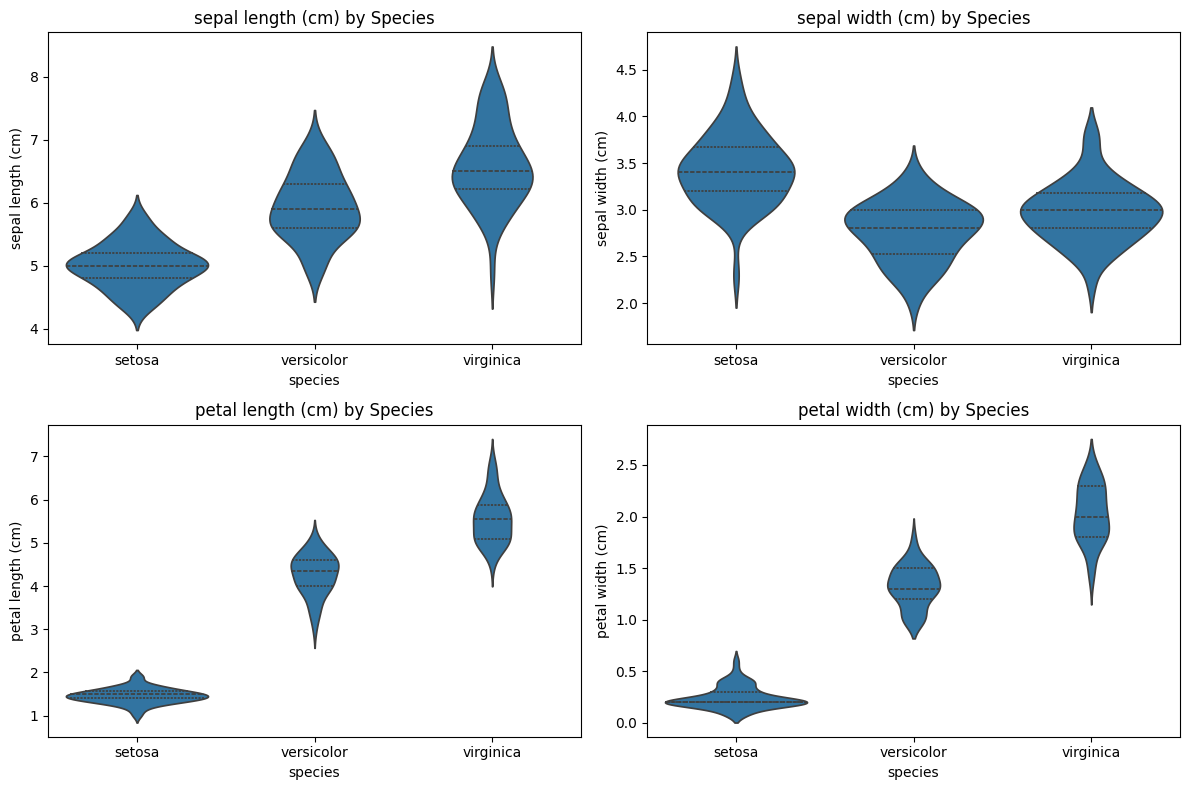

In [49]:
# Create histograms for each feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Create a scatter plot matrix
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Iris Dataset', y=1.02)
plt.show()

# Create box plots for each feature by species
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

# Create a violin plot
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=iris_df, inner='quartile')
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

### الخطوة الثالثة: دراسة العلاقات بين الاعمدة والعمود الهدف الذي اخترناه


*حساب مصفوفة الارتباط*

1: ارتباط إيجابي قوي (زيادة في العمود الأول تعني زيادة في العمود الثاني).

-1: ارتباط سلبي قوي (زيادة في العمود الأول تعني انخفاض في العمود الثاني).

0: لا يوجد ارتباط.

--- 
اللون الأحمر/الأزرق: يشير إلى الارتباطات القوية (إيجابي أو سلبي).

اللون الأبيض أو الألوان الباهتة: تشير إلى ارتباط ضعيف أو عدم وجود ارتباط.

القيم الرقمية في الخلايا: هي قيم الارتباط الفعلي بين الأعمدة.

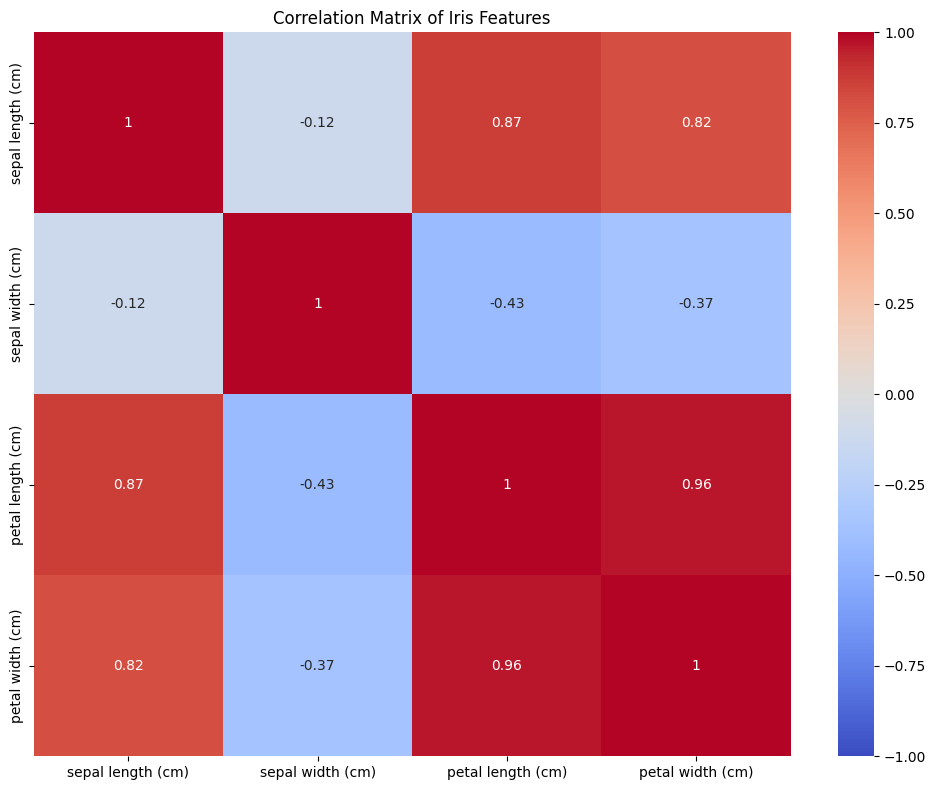

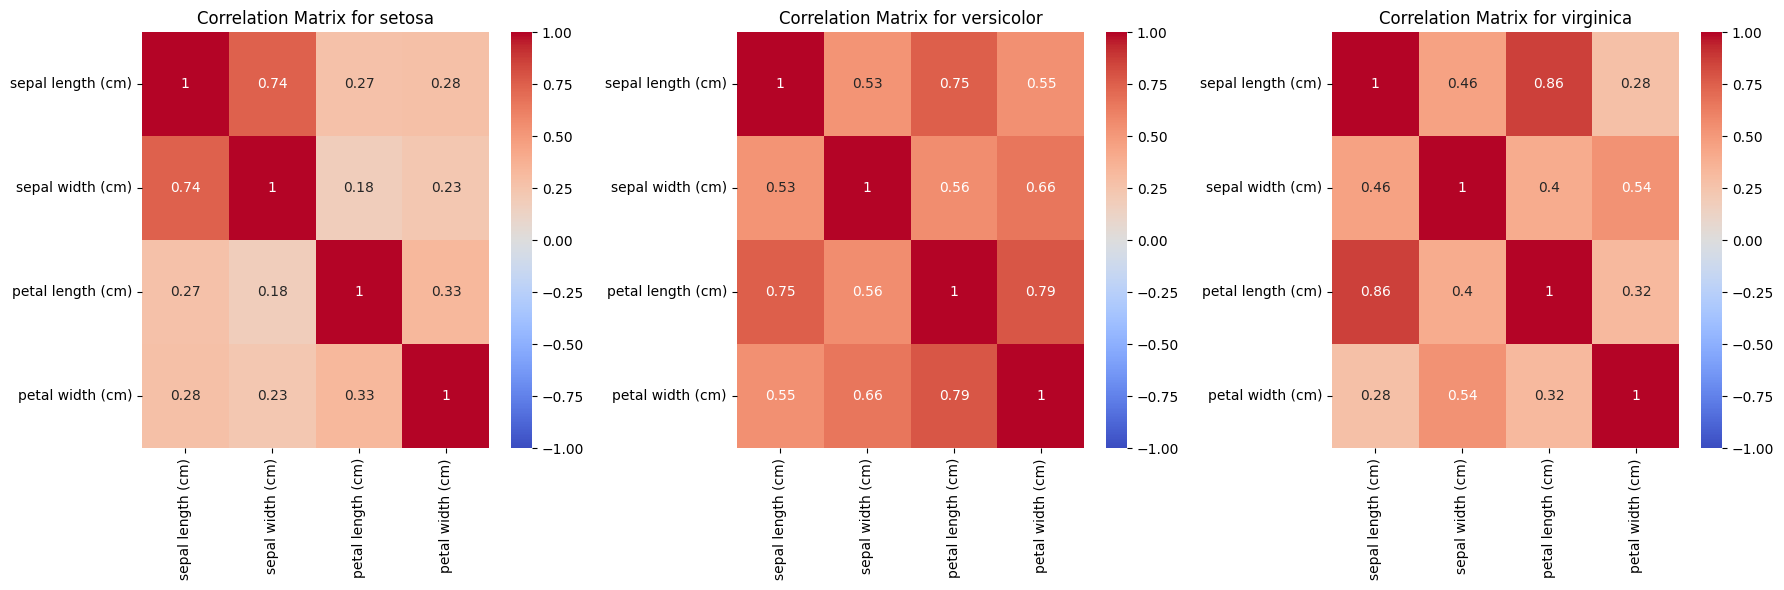

In [50]:
# Calculate correlation matrix
correlation_matrix = iris_df.drop(columns=['species']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()

# Analyze correlation by species
species_names = iris_df['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, species in enumerate(species_names):
    subset = iris_df[iris_df['species'] == species].drop(columns=['species'])
    corr = subset.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for {species}')

plt.tight_layout()
plt.show()

In [51]:
# Calculate descriptive statistics by species
stats_by_species = iris_df.groupby('species').describe()
print("Descriptive statistics by species:")
print(stats_by_species)
# Perform ANOVA to compare means across species


for feature in iris.feature_names:
    # Create groups for ANOVA
    groups = [iris_df[iris_df['species'] == species][feature] for species in species_names]
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"\nANOVA for {feature}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

Descriptive statistics by species:
           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean     

/var/folders/f7/wjsg2sjd4lj9xj4j4lvdskq40000gn/T/ipykernel_12910/1806527599.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_species = iris_df.groupby('species').describe()


و اختبار إحصائي يُستخدم لمقارنة المتوسطات بين أكثر من مجموعتين. في هذه الحالة، يتم استخدام اختبار ANOVA لمقارنة المتوسطات بين الأنواع المختلفة في مجموعة البيانات (Setosa, Versicolor, Virginica) في خصائص معينة (مثل طول السيبال، عرض السيبال، إلخ).

### إحصائية F (F-statistic)  
تقيس مدى التباين بين المجموعات مقارنة بالتباين داخل المجموعات. إذا كانت قيمة **F** كبيرة، فهذا يشير إلى أن الفروق بين المجموعات قد تكون كبيرة.  

### القيمة p (p-value)  
تحدد ما إذا كان الفرق بين المجموعات ذو دلالة إحصائية. إذا كانت **p-value** أقل من **0.05**، فهذا يشير إلى وجود فرق معنوي بين المجموعات.  
بمعنى آخر، إذا كانت **p-value** أقل من **0.05**، نرفض الفرضية الصفرية (التي تنص على عدم وجود فرق بين المجموعات) ونقبل الفرضية البديلة (التي تشير إلى وجود فرق معنوي بين المجموعات).  

### النتيجة  
يتم طباعة **إحصائية F** و **p-value**، وإذا كانت **p-value < 0.05**، يتم طباعة **"Yes"** للإشارة إلى وجود فرق معنوي بين المتوسطات، وإلا يتم طباعة **"No"**.  

### الفائدة من هذا التحليل  
- **الإحصائيات الوصفية** توفر معلومات أساسية حول البيانات، مثل المتوسط والانحراف المعياري لكل نوع.  
- **اختبار ANOVA** يساعد في تحديد ما إذا كانت هناك فروقات معنوية بين الأنواع في الخصائص المختلفة.  
  مثلاً، إذا وُجدت فروق معنوية في **طول السيبال** بين الأنواع الثلاثة، فقد يكون ذلك مؤشرًا على إمكانية التمييز بين الأنواع بناءً على هذه الخاصية.  


### الخطوة الثالثة: استخلاص النتائج

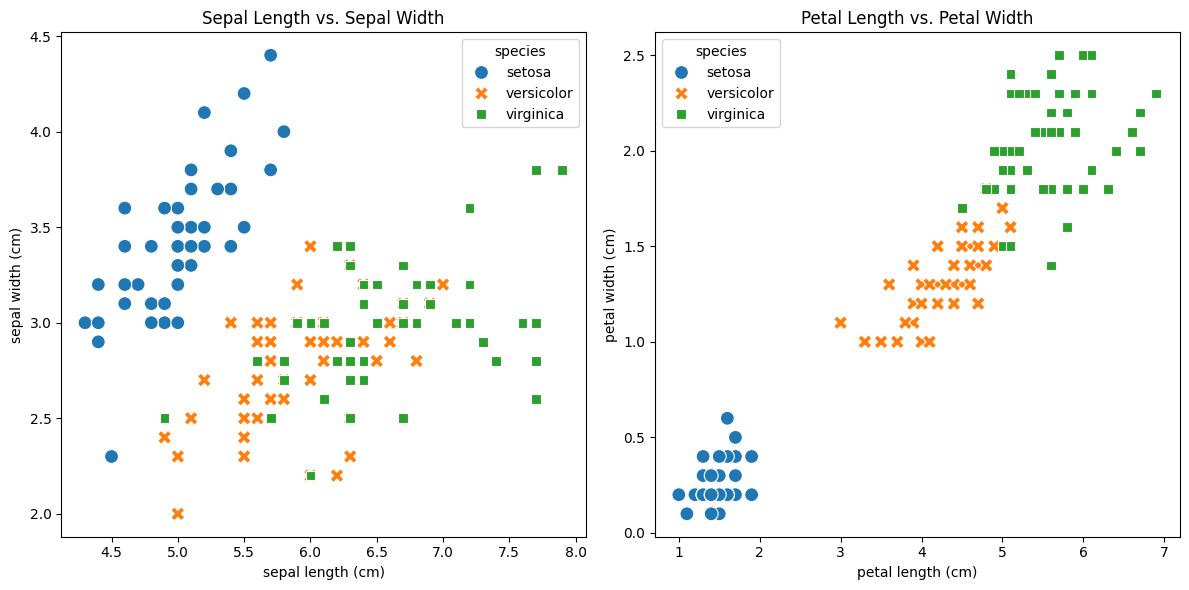


Key Findings from Iris Dataset Analysis:
1. Iris setosa is clearly separable from the other two species based on petal measurements
2. Iris virginica and Iris versicolor have some overlap but can be distinguished
3. Petal length and petal width show the strongest correlation
4. Petal measurements are more useful than sepal measurements for species identification
5. All features show statistically significant differences across species


In [52]:
# Create a summary visualization
plt.figure(figsize=(12, 6))

# Plot sepal length vs. sepal width
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', style='species', s=100, data=iris_df)
plt.title('Sepal Length vs. Sepal Width')

# Plot petal length vs. petal width
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                hue='species', style='species', s=100, data=iris_df)
plt.title('Petal Length vs. Petal Width')

plt.tight_layout()
plt.show()

# Print key findings
print("\nKey Findings from Iris Dataset Analysis:")
print("1. Iris setosa is clearly separable from the other two species based on petal measurements")
print("2. Iris virginica and Iris versicolor have some overlap but can be distinguished")
print("3. Petal length and petal width show the strongest correlation")
print("4. Petal measurements are more useful than sepal measurements for species identification")
print("5. All features show statistically significant differences across species")

*الهدف من هذا التصور*

مقارنة أنماط الأنواع المختلفة: يساعد التلوين (hue='species') والتنسيق (style='species') في التعرف على كيفية توزيع الأنواع المختلفة في العلاقة بين المتغيرات.

فهم الفصل بين الأنواع:

إذا كانت الأنواع متجمعة في مناطق منفصلة في الرسم البياني، فهذا يشير إلى أنها يمكن تمييزها بسهولة بناءً على هذه الخصائص.

إذا كانت الأنواع متداخلة، فقد يكون من الصعب التمييز بينها باستخدام هذه الخصائص فقط.
### المتغيرات الأكثر تميزًا بين الأنواع يمكن استخدامها في نماذج التصنيف مثل SVM أو Decision Trees.

## تطبيق خوارزميات التجميع (Clustering) لتحديد الأنواع الثلاثة في مجموعة بيانات Iris

قبل تطبيق K-Means، من الجيد تطبيع البيانات (Scaling) باستخدام StandardScaler لتحسين أداء الخوارزمية.

In [53]:
# تطبيع البيانات (تحويلها إلى نفس المقياس)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # استبعاد عمود 'species'

# تطبيق K-Means مع k=3 (عدد الأنواع في البيانات الأصلية)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(iris_scaled)

# إضافة نتائج التجميع إلى DataFrame
iris_df['cluster'] = clusters

# عرض أول 5 صفوف مع التجمعات
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  cluster  
0  setosa        1  
1  setosa        1  
2  setosa        1  
3  setosa        1  
4  setosa        1  


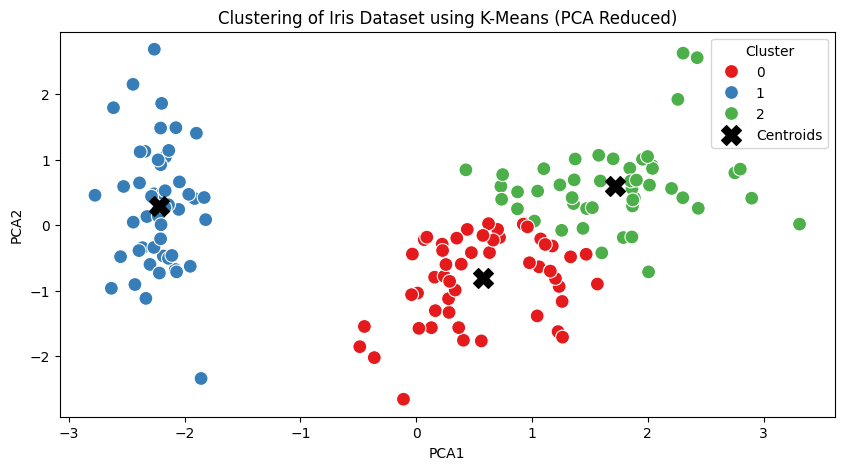

In [54]:
# تقليل الأبعاد إلى 2 باستخدام PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# إضافة المكونات الرئيسية إلى DataFrame
iris_df['PCA1'] = iris_pca[:, 0]
iris_df['PCA2'] = iris_pca[:, 1]

# رسم التجمعات
plt.figure(figsize=(10, 5))

# رسم النقاط مع الألوان حسب التجمعات
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', s=100, data=iris_df)


# رسم مراكز التجمعات
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title("Clustering of Iris Dataset using K-Means (PCA Reduced)")
plt.legend(title="Cluster")
plt.show()


In [55]:
# مقارنة التجمعات بالأنواع الحقيقية
comparison = pd.crosstab(iris_df['species'], iris_df['cluster'], rownames=['Actual'], colnames=['Cluster'])
comparison


Cluster,0,1,2
Actual,,,
setosa,0,50,0
versicolor,39,0,11
virginica,14,0,36


📌 تحليل كل صف:
كل صف يمثل نوعًا من الزهور في البيانات الأصلية (Actual)، وكل عمود (Cluster) يمثل مجموعة حددها نموذج K-Means.

Setosa (الصف الأول)

جميع عينات setosa (عددها 50) تم وضعها في المجموعة 1 (Cluster 1).

هذا يعني أن K-Means تعرف بدقة 100% على هذا النوع! 👍

Versicolor (الصف الثاني)

تم تصنيف 39 زهرة من versicolor في المجموعة 0 (Cluster 0).

بينما تم تصنيف 11 زهرة منها بالخطأ في المجموعة 2 (Cluster 2).

K-Means واجه صعوبة في الفصل التام بين versicolor و virginica.

Virginica (الصف الثالث)

تم تصنيف 36 زهرة من virginica في المجموعة 2 (Cluster 2).

ولكن 14 زهرة منها تم تصنيفها بالخطأ ضمن المجموعة 0 (Cluster 0).

هذا يشير إلى تداخل بين versicolor و virginica، مما جعل K-Means يخطئ في تصنيف بعض العينات.

استنتاجات:

✅ نجاح تام مع setosa
📉 خلط بين versicolor و virginica بسبب التشابه بينهما في بعض الخصائص.

🔹 السبب:

setosa متميزة جدًا عن باقي الأنواع، لذا حددها K-Means بدقة.

versicolor و virginica لديهما بعض التشابه، مما أدى إلى بعض الأخطاء.

### استخدام تقنية اخرى لحل المشكلة
📌 الخطوات الرئيسية:
تحميل بيانات Iris.

تطبيق K-Means لتقسيم البيانات إلى 3 مجموعات.

تطبيق t-SNE وتقليل الأبعاد إلى بعدين (2D).

تطبيق UMAP لتقليل الأبعاد إلى بعدين (2D).

رسم النتائج باستخدام Seaborn.

In [56]:
# تحميل بيانات Iris
iris_df['species'] = iris.target  # إضافة العمود الحقيقي للأنواع

# تطبيق K-Means (عدد المجموعات = 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(iris_df.iloc[:, :-1])
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
iris_df[['TSNE1', 'TSNE2']] = tsne.fit_transform(iris_df.iloc[:, :-2])  # استبعاد الأعمدة غير العددية
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster,PCA1,PCA2,TSNE1,TSNE2
0,5.1,3.5,1.4,0.2,0,2,-2.264703,0.480027,-24.714949,-3.083350
1,4.9,3.0,1.4,0.2,0,2,-2.080961,-0.674134,-22.431211,-4.051456
2,4.7,3.2,1.3,0.2,0,2,-2.364229,-0.341908,-22.270678,-3.029007
3,4.6,3.1,1.5,0.2,0,2,-2.299384,-0.597395,-21.976007,-3.272852
4,5.0,3.6,1.4,0.2,0,2,-2.389842,0.646835,-24.690903,-2.670188
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1.870503,0.386966,5.351567,5.696438
146,6.3,2.5,5.0,1.9,2,1,1.564580,-0.896687,9.249340,2.788059
147,6.5,3.0,5.2,2.0,2,0,1.521170,0.269069,5.465008,5.104106
148,6.2,3.4,5.4,2.3,2,0,1.372788,1.011254,5.812052,6.075196


/Users/rashedmahram/Downloads/ML/Day2/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/rashedmahram/Downloads/ML/Day2/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


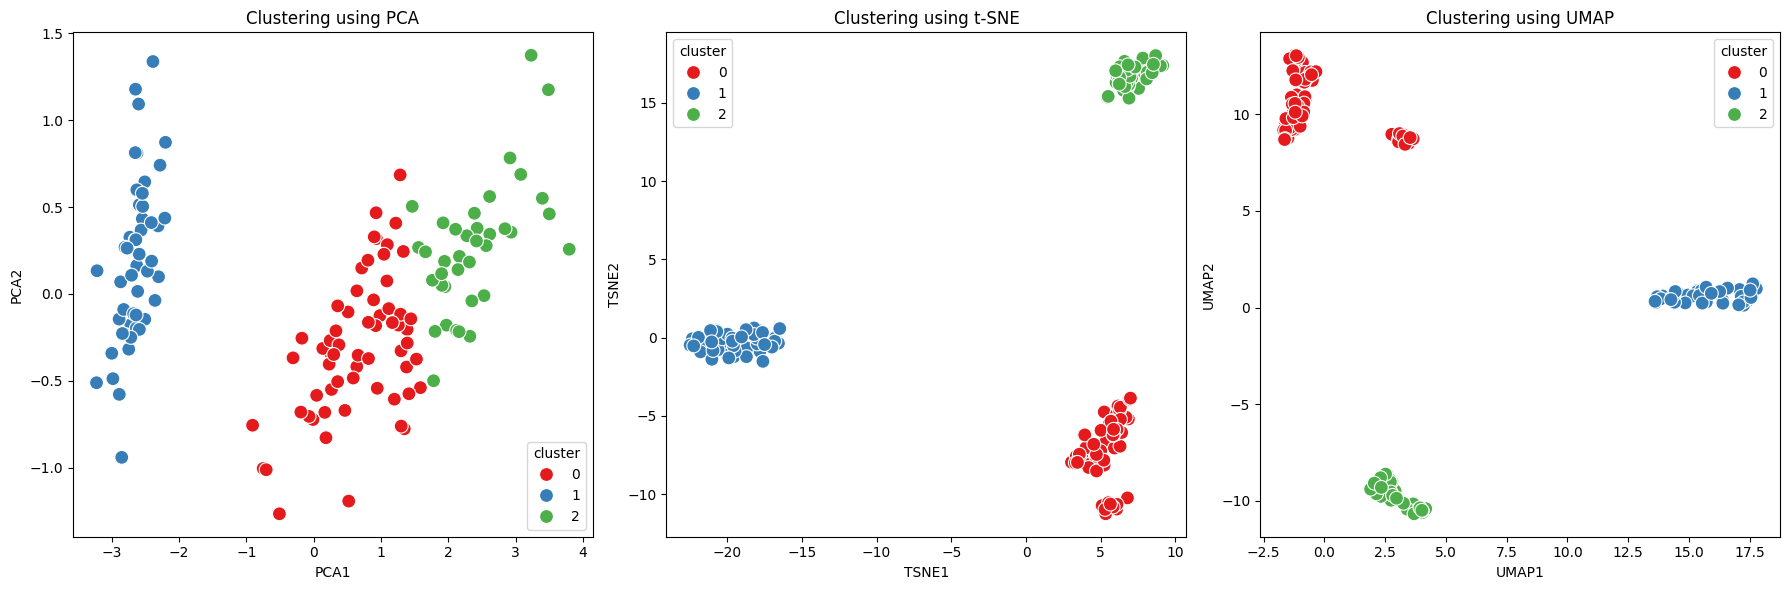

Crosstab comparison after PCA:
Cluster (PCA)   0   1   2
Actual                   
0               0  50   0
1              48   0   2
2              14   0  36

Crosstab comparison after t-SNE:
Cluster (t-SNE)   0   1   2
Actual                     
0                 0  50   0
1                48   0   2
2                14   0  36

Crosstab comparison after UMAP:
Cluster (UMAP)   0   1   2
Actual                    
0                0  50   0
1               48   0   2
2               14   0  36


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans

# تحميل بيانات Iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # إضافة العمود الحقيقي للأنواع

# تطبيق K-Means (عدد المجموعات = 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_df['cluster'] = kmeans.fit_predict(iris_df.iloc[:, :-1])

# تطبيق PCA لتقليص الأبعاد إلى بعدين
pca = PCA(n_components=2)
iris_df[['PCA1', 'PCA2']] = pca.fit_transform(iris_df.iloc[:, :-2])

# تطبيق t-SNE لتقليص الأبعاد إلى بعدين
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
iris_df[['TSNE1', 'TSNE2']] = tsne.fit_transform(iris_df.iloc[:, :-2])

# تطبيق UMAP لتقليص الأبعاد إلى بعدين
umap_model = umap.UMAP(n_components=2, random_state=42)
iris_df[['UMAP1', 'UMAP2']] = umap_model.fit_transform(iris_df.iloc[:, :-2])

# رسم النتائج
plt.figure(figsize=(18, 6))

# رسم التوزيع باستخدام PCA
plt.subplot(1, 3, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', s=100, data=iris_df)
plt.title("Clustering using PCA")

# رسم التوزيع باستخدام t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', palette='Set1', s=100, data=iris_df)
plt.title("Clustering using t-SNE")

# رسم التوزيع باستخدام UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster', palette='Set1', s=100, data=iris_df)
plt.title("Clustering using UMAP")

plt.tight_layout()
plt.show()
# إنشاء جدول مقارن بين الأنواع والتجمعات بعد تقليص الأبعاد
comparison_pca = pd.crosstab(iris_df['species'], iris_df['cluster'], rownames=['Actual'], colnames=['Cluster (PCA)'])
comparison_tsne = pd.crosstab(iris_df['species'], iris_df['cluster'], rownames=['Actual'], colnames=['Cluster (t-SNE)'])
comparison_umap = pd.crosstab(iris_df['species'], iris_df['cluster'], rownames=['Actual'], colnames=['Cluster (UMAP)'])

# عرض الجداول
print("Crosstab comparison after PCA:")
print(comparison_pca)

print("\nCrosstab comparison after t-SNE:")
print(comparison_tsne)

print("\nCrosstab comparison after UMAP:")
print(comparison_umap)

### مقارنة بين التقنيات:

| التقنية           | نوع البيانات | المزايا                                           | العيوب                                           |
|------------------|--------------|-------------------------------------------------|-------------------------------------------------|
| **Autoencoders**  | غير خطية       | فعالة في التعامل مع بيانات غير خطية ومعقدة      | تتطلب وقتًا طويلًا للتدريب في بعض الحالات     |
| **t-SNE**         | غير خطية       | جيد في الحفاظ على العلاقات المحلية            | بطيء في البيانات الكبيرة، صعب في البيانات عالية الأبعاد |
| **UMAP**          | غير خطية       | أسرع من t-SNE، يحفظ الهيكل المحلي والعالمي      | قد يحتاج لبعض التعديلات للحصول على أفضل النتائج |
| **DBSCAN**        | بيانات ضوضائية  | لا يتطلب تحديد عدد التجمعات مسبقًا، جيد مع البيانات الضوضائية | قد يكون صعبًا في ضبط المعلمات                |
| **Isomap**        | بيانات غير خطية | يحافظ على البنية الجغرافية للبيانات            | حساس جدًا للضوضاء                             |
| **SOM**           | بيانات غير خطية | يظهر الترتيب المكاني للبيانات                   | قد يكون معقدًا في بعض التطبيقات               |
| **Hierarchical Clustering** | بيانات متنوعة | جيد مع الهيكل الهرمي للتجمعات                  | يتطلب وقتًا طويلًا مع البيانات الكبيرة        |


## لتطوير نموذج تصنيف بسيط للتنبؤ بالأنواع بناءً على القياسات في مجموعة بيانات Iris، سنستخدم Scikit-learn لبناء نموذج K-Nearest Neighbors (KNN) كمثال على نموذج تصنيف. إليك الخطوات اللازمة لإنشاء النموذج:

In [60]:
# استيراد المكتبات
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# تحميل بيانات Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# تقسيم البيانات إلى المدخلات والمخرجات
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# توحيد البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# بناء نموذج KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# التنبؤ بالأنواع في مجموعة الاختبار
y_pred = knn.predict(X_test_scaled)

# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# عرض تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



النتائج التي حصلت عليها تشير إلى أن نموذج KNN قد حقق دقة 100% في تصنيف الأنواع الثلاثة في مجموعة الاختبار. دعني أشرح كل جزء من تقرير التصنيف:

1. الدقة (Precision):
الدقة تُظهر نسبة العينات التي تم تصنيفها بشكل صحيح ضمن كل فئة مقارنةً بجميع العينات التي تم تصنيفها لتلك الفئة.

Precision للنوع 0 = 1.00: يعني أن جميع العينات التي تم تصنيفها كـ "setosa" كانت صحيحة.

Precision للنوع 1 = 1.00: جميع العينات التي تم تصنيفها كـ "versicolor" كانت صحيحة.

Precision للنوع 2 = 1.00: جميع العينات التي تم تصنيفها كـ "virginica" كانت صحيحة.

2. الاسترجاع (Recall):
الاسترجاع يُظهر نسبة العينات التي تم التعرف عليها بنجاح من جميع العينات التي تنتمي إلى الفئة.

Recall للنوع 0 = 1.00: يعني أن جميع العينات من نوع "setosa" تم تصنيفها بشكل صحيح.

Recall للنوع 1 = 1.00: جميع العينات من نوع "versicolor" تم تصنيفها بشكل صحيح.

Recall للنوع 2 = 1.00: جميع العينات من نوع "virginica" تم تصنيفها بشكل صحيح.

3. الـ F1-score:
الـ F1-score هو مقياس موازن بين الدقة و الاسترجاع. يعكس هذا المقياس التوازن بين الدقة والاسترجاع:

F1 للنوع 0 = 1.00: يعني أن هناك توازنًا مثاليًا بين الدقة والاسترجاع في هذا النوع.

F1 للنوع 1 = 1.00: نفس الشيء بالنسبة للنوع "versicolor".

F1 للنوع 2 = 1.00: نفس الشيء بالنسبة للنوع "virginica".

4. الدقة العامة (Accuracy):
الدقة العامة هي نسبة العينات التي تم تصنيفها بشكل صحيح مقارنة بجميع العينات.

الدقة العامة = 1.00: يعني أن جميع العينات تم تصنيفها بشكل صحيح في مجموعة الاختبار.

5. المتوسطات:
المتوسط الماكرو (Macro avg): هو متوسط المقاييس عبر جميع الفئات، دون أخذ عدد العينات في الاعتبار. في هذه الحالة، جميع الفئات تحقق الدقة الكاملة.

المتوسط الموزون (Weighted avg): هو المتوسط مع أخذ عدد العينات في كل فئة في الاعتبار. أيضًا في هذه الحالة، جميع الفئات تحقق الدقة الكاملة.

الخلاصة:
الدقة 100% في هذا السياق تعني أن النموذج قام بتصنيف جميع العينات بشكل صحيح.

تم الوصول إلى هذه النتيجة المثالية بسبب أن البيانات الخاصة بمجموعة Iris هي بيانات بسيطة وسهلة التصنيف، مما يجعلها مثالية لاختبار النماذج الأساسية مثل KNN.

In [3]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Create a scatter plot using Plotly
fig = px.scatter(iris_df, x='sepal length (cm)', y='sepal width (cm)', color='species',
                 title="Iris Dataset: Sepal Length vs Sepal Width")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Iris Dataset Visualization"),
    
    dcc.Graph(figure=fig),
    
    html.P("Use the dropdown to select a species:"),
    
    dcc.Dropdown(
        id='species-dropdown',
        options=[{'label': species, 'value': species} for species in iris.target_names],
        value='setosa',
        multi=False
    ),
    
    html.Div(id='species-info')
])

# Callback to update the plot based on selected species
@app.callback(
    dash.dependencies.Output('species-info', 'children'),
    [dash.dependencies.Input('species-dropdown', 'value')]
)
def update_species_info(species):
    species_data = iris_df[iris_df['species'] == species]
    return f"Selected species: {species}. The dataset contains {len(species_data)} samples of this species."

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import plotly.express as px

# الخطوة 1: تحميل مجموعة بيانات الأيريس
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# الخطوة 2: تطبيق PCA لتقليص الأبعاد
pca = PCA(n_components=2)  # تقليص الأبعاد إلى مكونين لتصوير البيانات في بعدين
pca_result = pca.fit_transform(iris_df[iris.feature_names])

# الخطوة 3: إضافة نتائج PCA إلى مجموعة البيانات
iris_df['PCA1'] = pca_result[:, 0]
iris_df['PCA2'] = pca_result[:, 1]

# الخطوة 4: تصوير نتائج PCA
fig = px.scatter(iris_df, x='PCA1', y='PCA2', color='species',
                 title="تحليل المكونات الرئيسية (PCA) لمجموعة بيانات الأيريس",
                 labels={'PCA1': 'المكون الرئيسي 1', 'PCA2': 'المكون الرئيسي 2'})
fig.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import plotly.express as px

# الخطوة 1: تحميل مجموعة بيانات الأيريس
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# الخطوة 2: تطبيق PCA لتقليص الأبعاد
pca = PCA(n_components=2)  # تقليص الأبعاد إلى مكونين لتصوير البيانات في بعدين
pca_result = pca.fit_transform(iris_df[iris.feature_names])

# الخطوة 3: إضافة نتائج PCA إلى مجموعة البيانات
iris_df['PCA1'] = pca_result[:, 0]
iris_df['PCA2'] = pca_result[:, 1]

# الخطوة 4: تصوير نتائج PCA
fig = px.scatter(iris_df, x='PCA1', y='PCA2', color='species',
                 title="تحليل المكونات الرئيسية (PCA) لمجموعة بيانات الأيريس",
                 labels={'PCA1': 'المكون الرئيسي 1', 'PCA2': 'المكون الرئيسي 2'})
fig.show()
